# 实战1.使用神经网络拟合三次函数

## 1.导入深度学习库
Tensorflow是一个基于数据流编程的符号数学系统，被广泛应用于各类机器学习算法的编程实现。  
matplotlib是一个Python的2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。  
NumPy系统是Python的一种开源的数值计算扩展。这种工具可用来存储和处理大型矩阵，比Python自身的嵌套列表结构要高效的多。  

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 2.创建数据

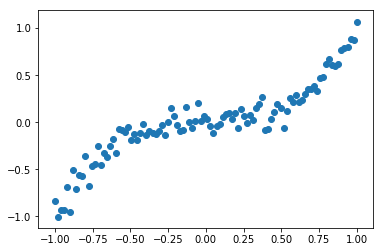

In [7]:
np.random.seed(1)                                   #创建随机数
x = np.linspace(-1, 1, 100)[:, np.newaxis]          #创建一个新维度
noise = np.random.normal(0, 0.1, size=x.shape)      #产生0-0.1之间x长度的随机数
y = np.power(x, 3) + noise                          #定义函数y为三次函数加上噪声的图像，可以修改此处的公式达到更改数据分布的目的
plt.scatter(x, y)                                   #定义x和y的散点图
plt.show()                                          #画图

## 3.定义模型结构

#### 3.1. 定义输入数据的维度，以及初始权重的分布

In [8]:
tf.set_random_seed(1)#设定随机种子
tf_x = tf.placeholder(tf.float32, x.shape) #定义占位符x
tf_y = tf.placeholder(tf.float32, y.shape) #定义占位符y

#### 3.2. 定义隐藏层激活函数(此处可以自行修改激活函数)

In [9]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)  #定义隐藏层，使用relu激活函数
# l1 = tf.layers.dense(tf_x, 10, tf.sigmoid)  #定义隐藏层，使用sigmoid激活函数
# l1 = tf.layers.dense(tf_x, 10, tf.tanh)  #定义隐藏层，使用tanh激活函数
# l1 = tf.layers.dense(tf_x, 10, tf.nn.softplus)  #定义隐藏层，使用softplus激活函数
# l1 = tf.layers.dense(tf_x, 10, tf.nn.relu6)  #定义隐藏层，使用relu6激活函数

#### 3.3. 定义损失函数  
均方差：$loss = \frac{1}{n}\sum (y_{pre}-y_{true})^2$

In [10]:
output = tf.layers.dense(l1, 1)   #定义输出层
loss = tf.losses.mean_squared_error(tf_y, output)   # 定义损失值均方误差loss

#### 3.4. 定义优化器

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)                              #定义学习率为0.5的梯度下降算法的优化器
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)           #定义学习率为0.001的adam优化器，使用该优化器可以适当提高循环次数
# optimizer = tf.train.MomentumOptimizer(learning_rate=0.5, momentum=0.9)                           #定义学习率为0.5的momentum优化器
# optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9, use_nesterov=True)           #定义学习率为0.01的NAG优化器
train_op = optimizer.minimize(loss)                          #使用优化器最小化loss函数值

## 4. 训练并可是可视化

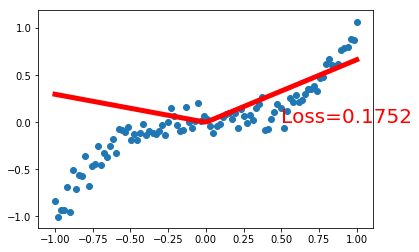

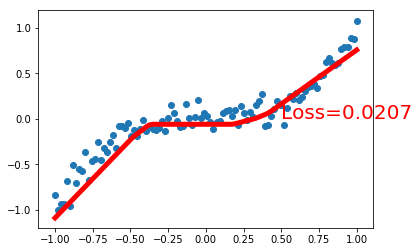

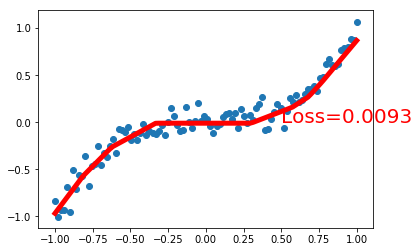

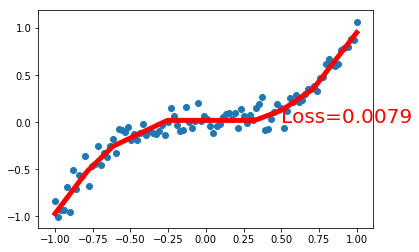

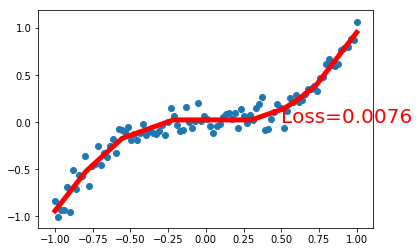

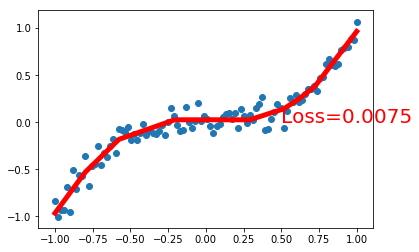

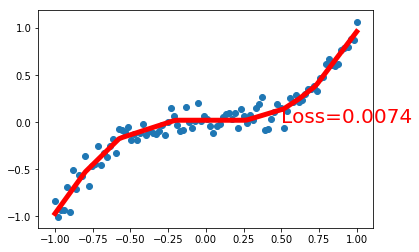

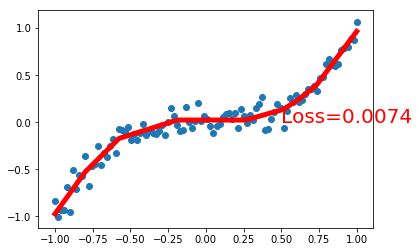

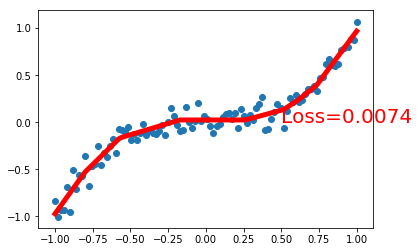

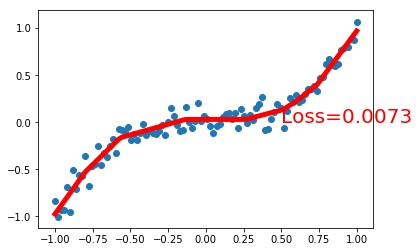

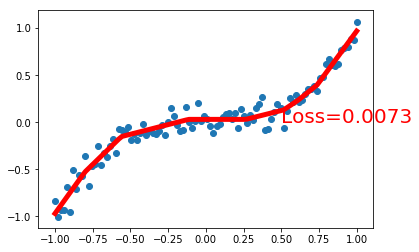

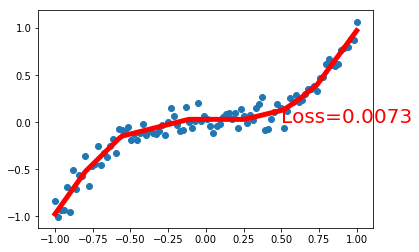

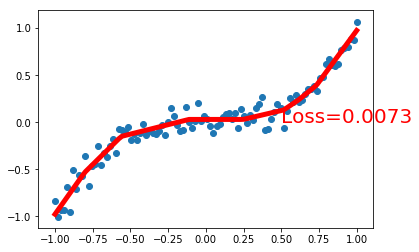

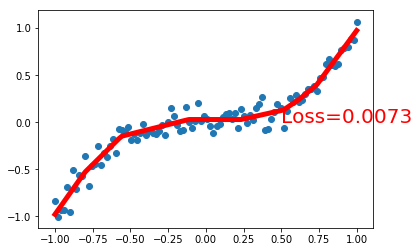

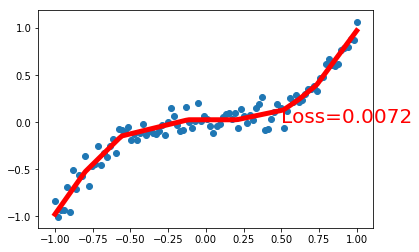

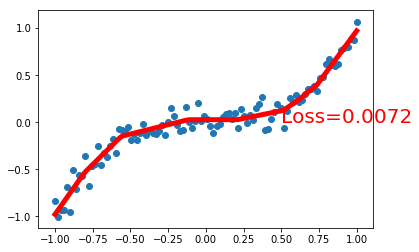

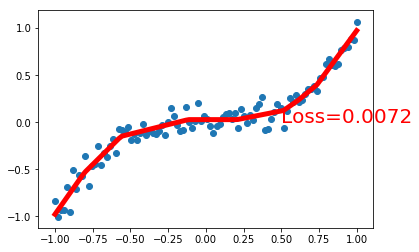

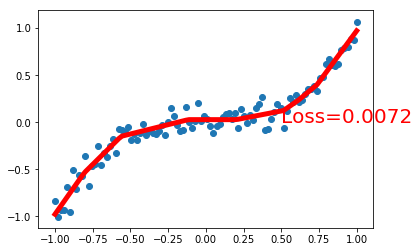

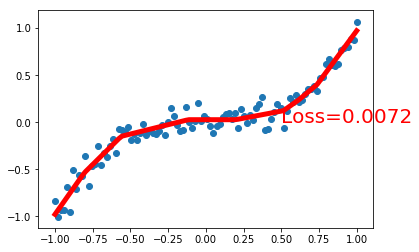

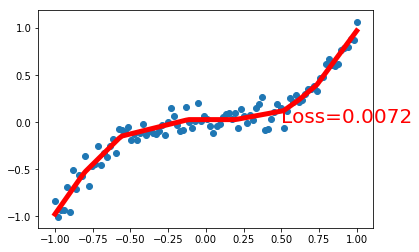

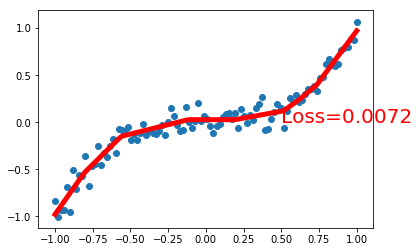

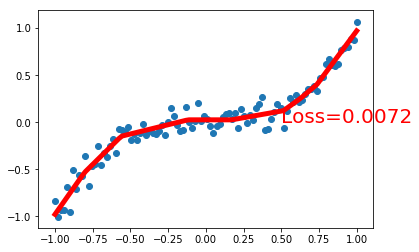

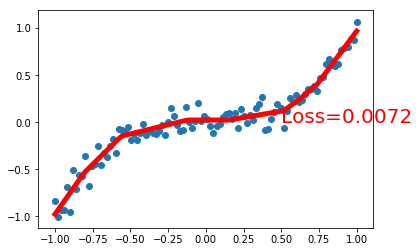

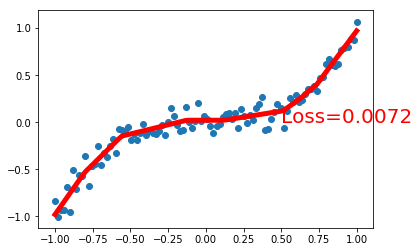

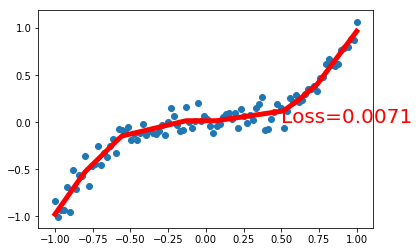

In [28]:
with tf.Session() as sess:        #定义会话
    sess.run(tf.global_variables_initializer()) #会话占位符初始化

    plt.ion()   # 打开交互模式

    for step in range(500):
        #训练神经网络并输出损失值l和预测值pred
        _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
        if step % 20 == 0:#每训练5次输出一次
            # 画图
            plt.cla()
            plt.scatter(x, y)
            plt.plot(x, pred, 'r-', lw=5)#画出x和预测值pred的散点图
            plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})#输出损失值l
            plt.pause(0.1)

    plt.ioff()#关闭交互模式
    plt.show()#画图